# House Price Prediction

### Data Lit || Homework Assignment || Regression

by Denis Volchugin

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msngo

import warnings
warnings.filterwarnings("ignore")

from scipy import stats

sns.set()
pd.set_option('display.float_format', lambda x: '{:.3f}'.format(x))

%matplotlib inline

In [2]:
test = pd.read_csv ('../Data/test.csv')
train = pd.read_csv ('../Data/train.csv')

In [3]:
pd.set_option ('display.max_columns', 500)
pd.set_option ('display.max_rows', 500)

In [4]:
D = train.describe(include='all').T

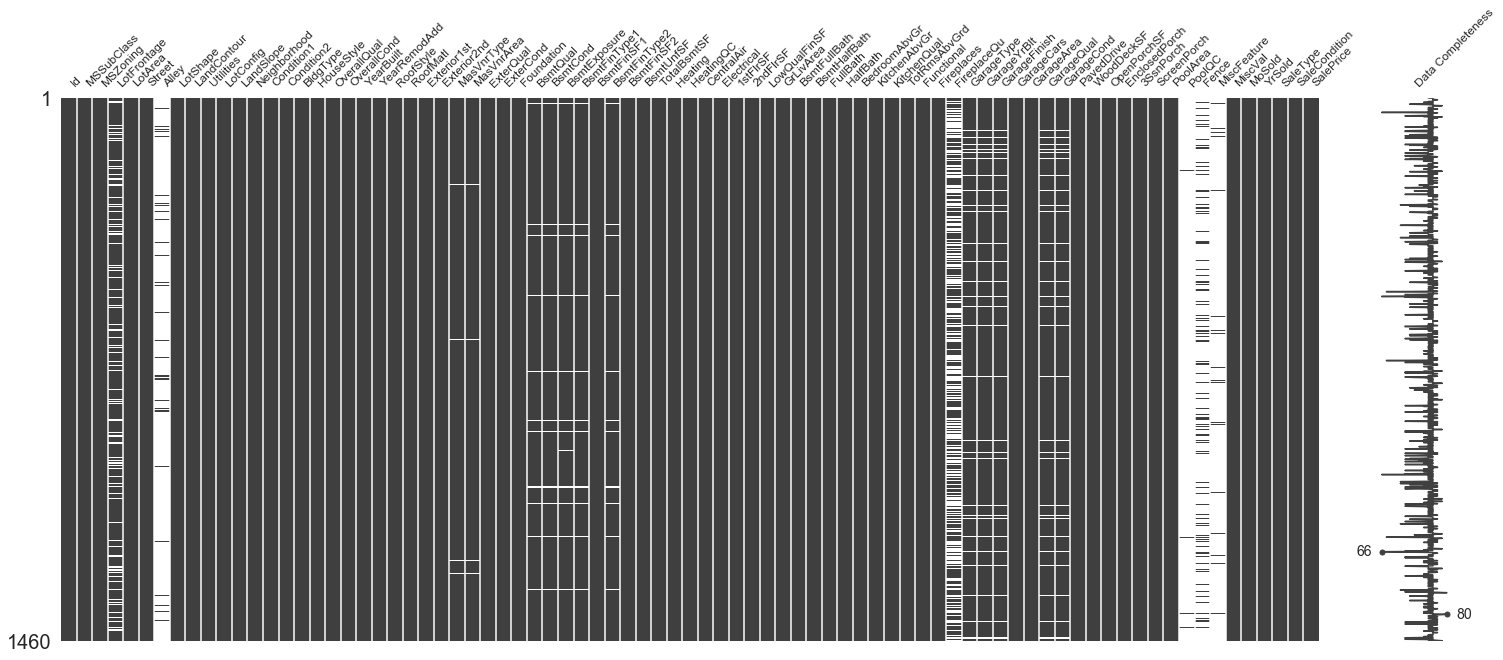

In [5]:
msngo.matrix(train, labels=True, fontsize=12);

In [6]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.000,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.000,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.000,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.000,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.000,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.000,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.000,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.000,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.000,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.000,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.000,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.000,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.000,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.000,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.000,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [7]:
for column in train.columns:
    print(column, train[column].nunique(), train[column].dtype)

Id 1460 int64
MSSubClass 15 int64
MSZoning 5 object
LotFrontage 110 float64
LotArea 1073 int64
Street 2 object
Alley 2 object
LotShape 4 object
LandContour 4 object
Utilities 2 object
LotConfig 5 object
LandSlope 3 object
Neighborhood 25 object
Condition1 9 object
Condition2 8 object
BldgType 5 object
HouseStyle 8 object
OverallQual 10 int64
OverallCond 9 int64
YearBuilt 112 int64
YearRemodAdd 61 int64
RoofStyle 6 object
RoofMatl 8 object
Exterior1st 15 object
Exterior2nd 16 object
MasVnrType 4 object
MasVnrArea 327 float64
ExterQual 4 object
ExterCond 5 object
Foundation 6 object
BsmtQual 4 object
BsmtCond 4 object
BsmtExposure 4 object
BsmtFinType1 6 object
BsmtFinSF1 637 int64
BsmtFinType2 6 object
BsmtFinSF2 144 int64
BsmtUnfSF 780 int64
TotalBsmtSF 721 int64
Heating 6 object
HeatingQC 5 object
CentralAir 2 object
Electrical 5 object
1stFlrSF 753 int64
2ndFlrSF 417 int64
LowQualFinSF 24 int64
GrLivArea 861 int64
BsmtFullBath 4 int64
BsmtHalfBath 3 int64
FullBath 4 int64
HalfBath 3 

In [8]:
C = D['unique'].dropna().sort_values()[:10]
C

Street          2
Alley           2
CentralAir      2
Utilities       2
LandSlope       3
PoolQC          3
PavedDrive      3
GarageFinish    3
BsmtQual        4
ExterQual       4
Name: unique, dtype: object

In [9]:
pd.unique(train[['Street', 'CentralAir', 'Utilities', 'LandSlope', 'PavedDrive', 'GarageFinish']].values.ravel('K'))

array(['Pave', 'Grvl', 'Y', 'N', 'AllPub', 'NoSeWa', 'Gtl', 'Mod', 'Sev',
       'P', 'RFn', 'Unf', 'Fin', nan], dtype=object)

In [10]:
Ctgls = ['Street', 'CentralAir', 'Utilities', 'LandSlope', 'PoolQC', 'PavedDrive', 'GarageFinish']

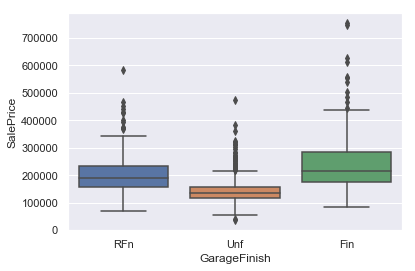

In [40]:
sns.boxplot(x=train['GarageFinish'], y=train['SalePrice']);

In [50]:
pd.pivot_table(train, values='SalePrice', index='GarageFinish', aggfunc='sum', margins=True)

,SalePrice
GarageFinish,
Fin,84498547
RFn,85273063
Unf,86004636
All,255776246


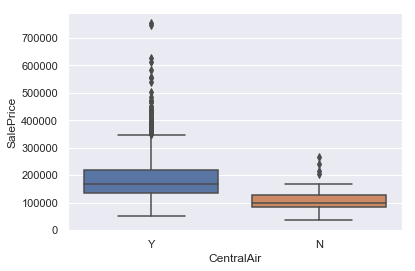

In [47]:
sns.boxplot(x=train['CentralAir'], y=train['SalePrice']);

In [49]:
pd.pivot_table(train, values='SalePrice', index='CentralAir', aggfunc='sum', margins=True)

,SalePrice
CentralAir,
N,10000087
Y,254144859
All,264144946


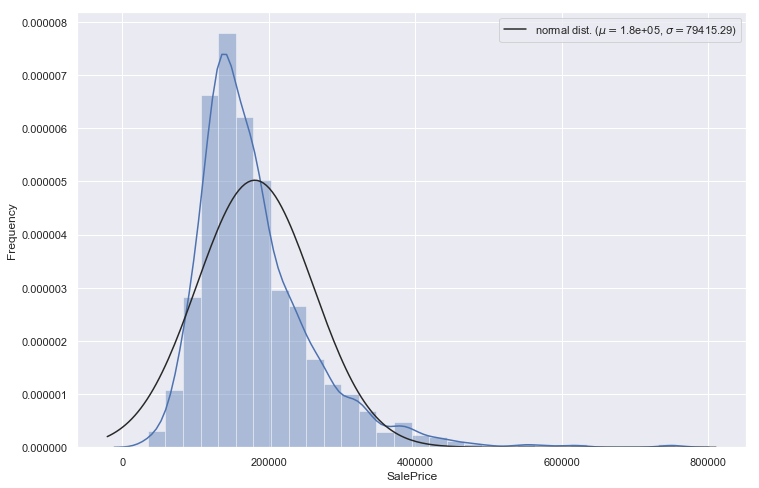

In [11]:
'fig, ax = plt.subplots (figsize=(12,8))
sns.distplot(train.SalePrice, fit=stats.norm, bins=30);

#get fit params
mu, sigma = stats.norm.fit(train.SalePrice)

#legend and label
plt.legend(["normal dist. ($\mu=${0:.2g}, $\sigma=${1:.2f})".format(mu, sigma)])
plt.ylabel('Frequency');

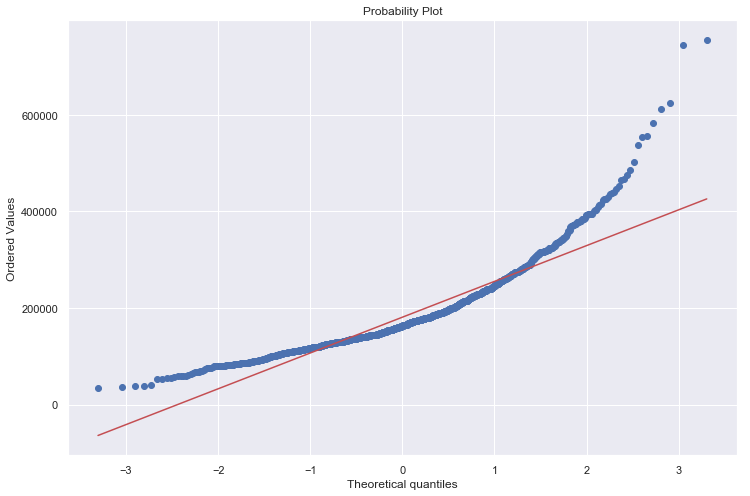

In [12]:
fig, ax = plt.subplots (figsize=(12,8))
res = stats.probplot(train['SalePrice'], plot=plt)

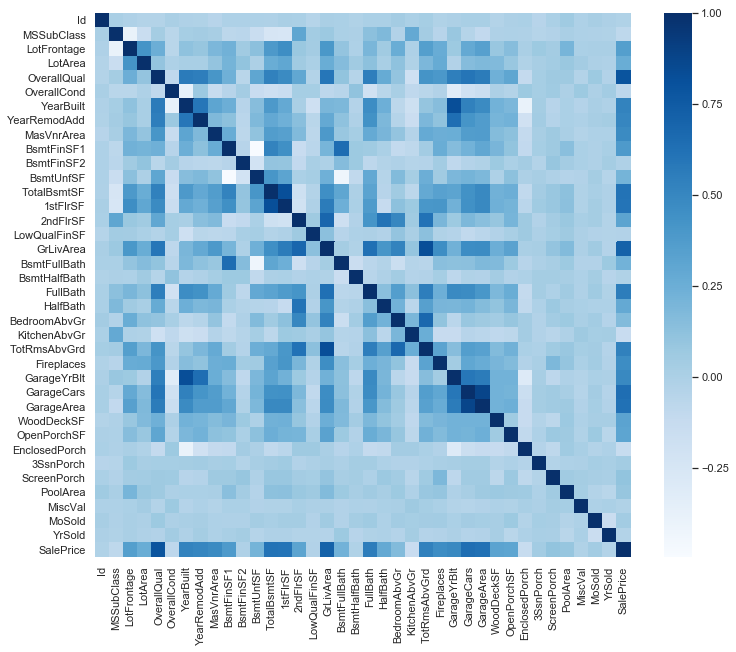

In [13]:
corrmat = train.corr()
fig, ax = plt.subplots (figsize=(12,10))
sns.heatmap (corrmat, cmap='Blues');

In [14]:
corrmat['SalePrice'].sort_values(ascending=False)[:15]

SalePrice      1.000
OverallQual    0.791
GrLivArea      0.709
GarageCars     0.640
GarageArea     0.623
TotalBsmtSF    0.614
1stFlrSF       0.606
FullBath       0.561
TotRmsAbvGrd   0.534
YearBuilt      0.523
YearRemodAdd   0.507
GarageYrBlt    0.486
MasVnrArea     0.477
Fireplaces     0.467
BsmtFinSF1     0.386
Name: SalePrice, dtype: float64

In [15]:
# main factors influencing SalePrice
Sfctr = ['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars',
       'TotalBsmtSF', 'FullBath', 'TotRmsAbvGrd', 'YearBuilt',
       'YearRemodAdd']

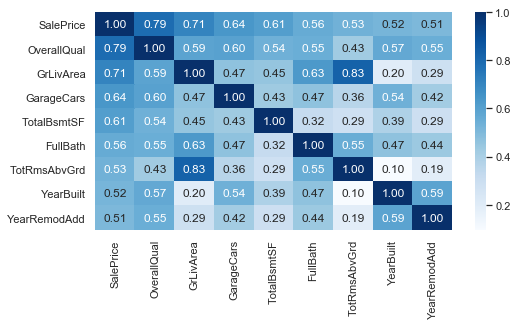

In [16]:
fig, ax = plt.subplots (figsize=(8, 4))
cm = np.corrcoef(train[Sfctr].values.T)
sns.set(font_scale=1)
sns.heatmap (cm, cmap='Blues', annot=True, fmt='.2f', yticklabels=Sfctr, xticklabels=Sfctr);

In [17]:
null = train[train[Sfctr] == 0][Sfctr].count()
NaN = train[train[Sfctr].isnull()][Sfctr].count()
NoData = pd.concat ([null, NaN], axis=1, keys=['null', 'NaN'])
NoData

,null,NaN
SalePrice,0,0
OverallQual,0,0
GrLivArea,0,0
GarageCars,81,0
TotalBsmtSF,37,0
FullBath,9,0
TotRmsAbvGrd,0,0
YearBuilt,0,0
YearRemodAdd,0,0


main factors that influence Sale Price don't have missing values. Garage cars and Total basement with zero values seem OK, since it is possible that there's no garage or basement in the house

In [18]:
len(train[train['YearBuilt'] != train['YearRemodAdd']])

696

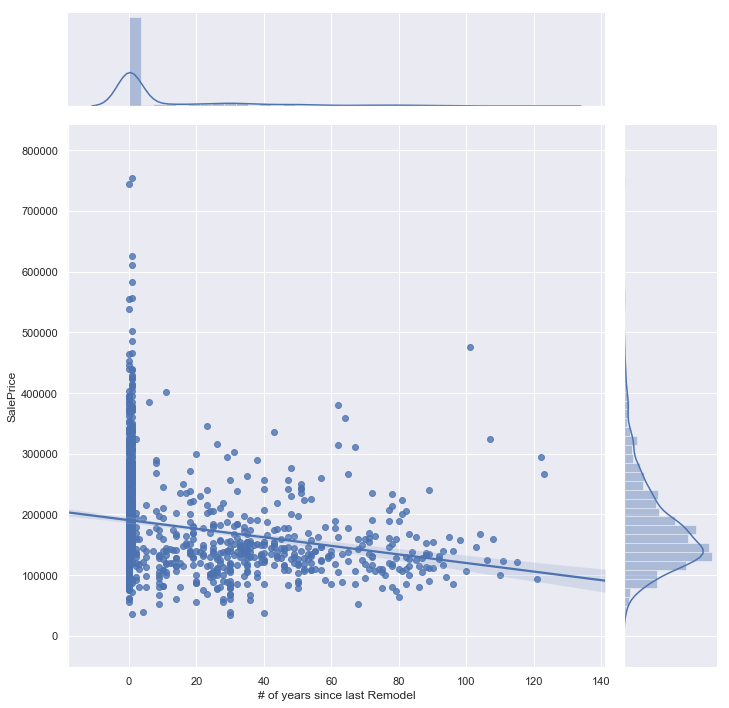

In [19]:
x = train['YearRemodAdd'] - train['YearBuilt']
sns.jointplot(x=x, y="SalePrice", kind="reg", height=10, data=train)
plt.xlabel ('# of years since last Remodel')
plt.show()

['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 'FullBath', 'TotRmsAbvGrd', 'YearBuilt', 'YearRemodAdd']


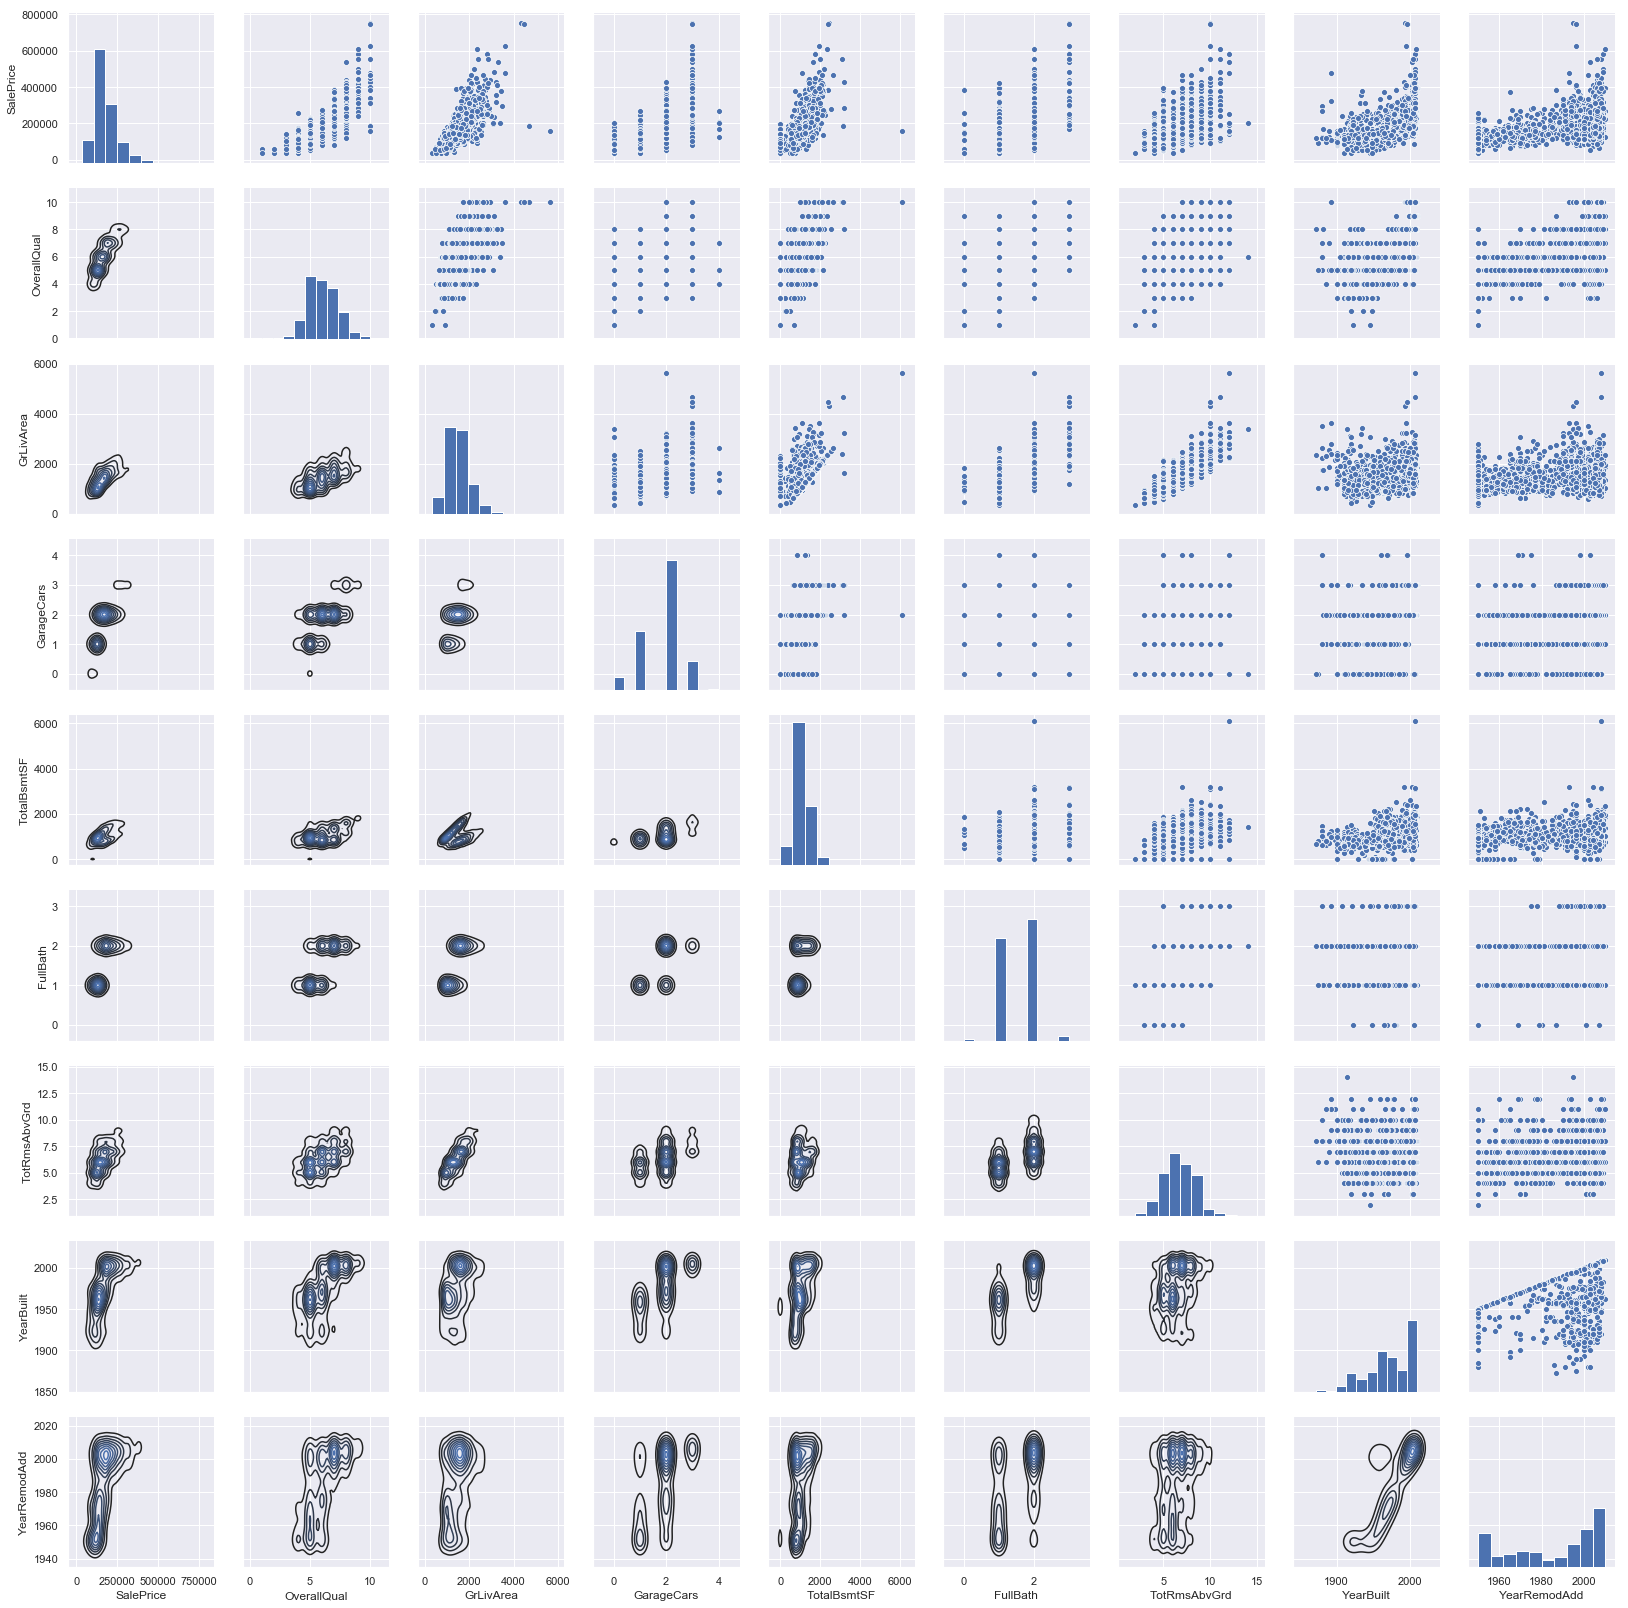

In [20]:
print(Sfctr)
g = sns.PairGrid(train[Sfctr])
g.map_upper(sns.scatterplot)
g.map_lower(sns.kdeplot)
g.map_diag(plt.hist);

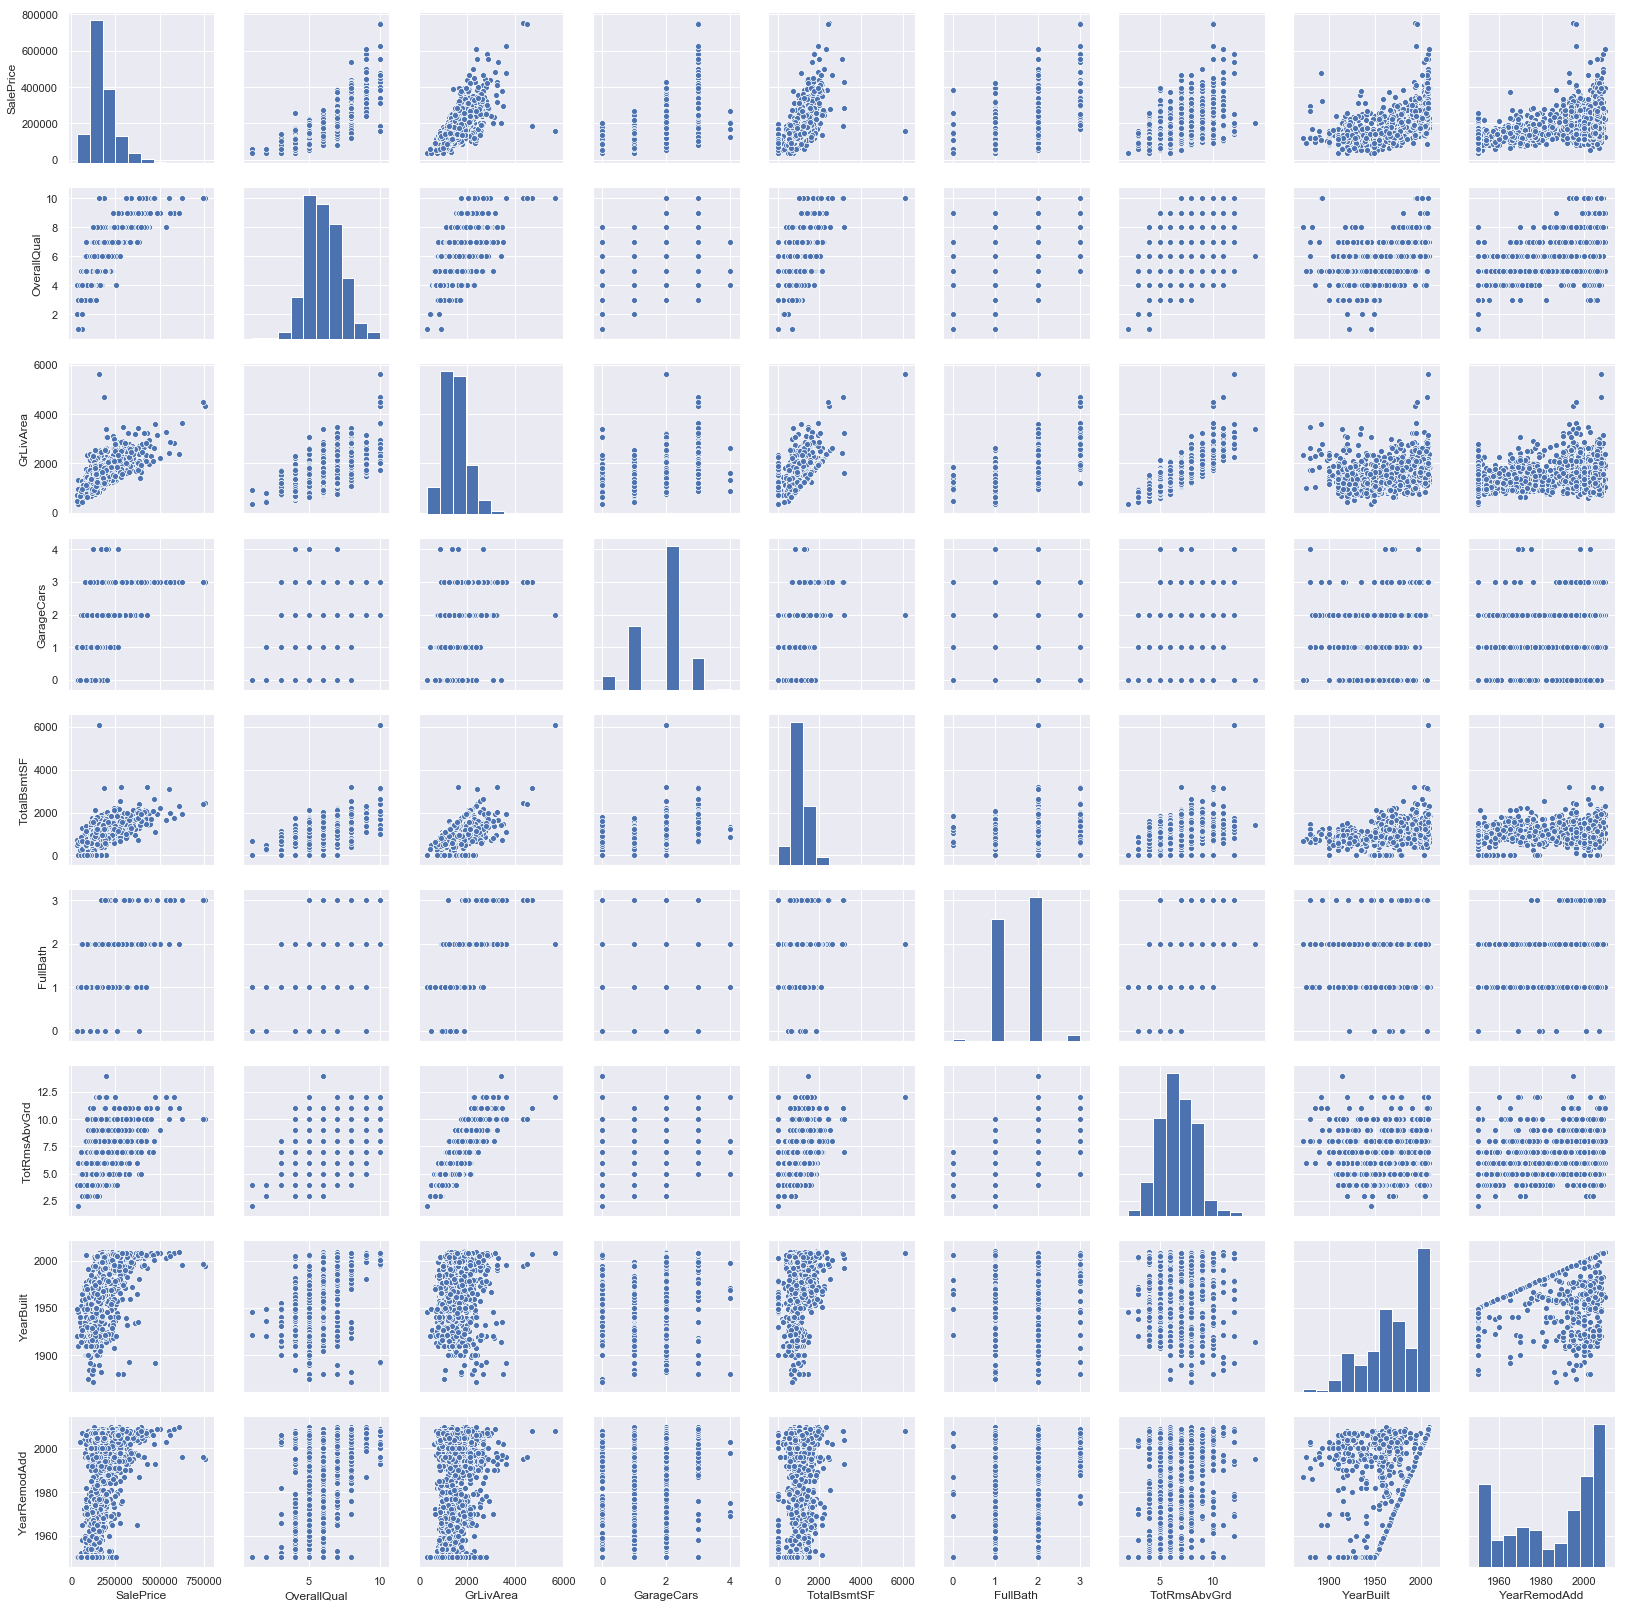

In [21]:
sns.pairplot(train[Sfctr]);

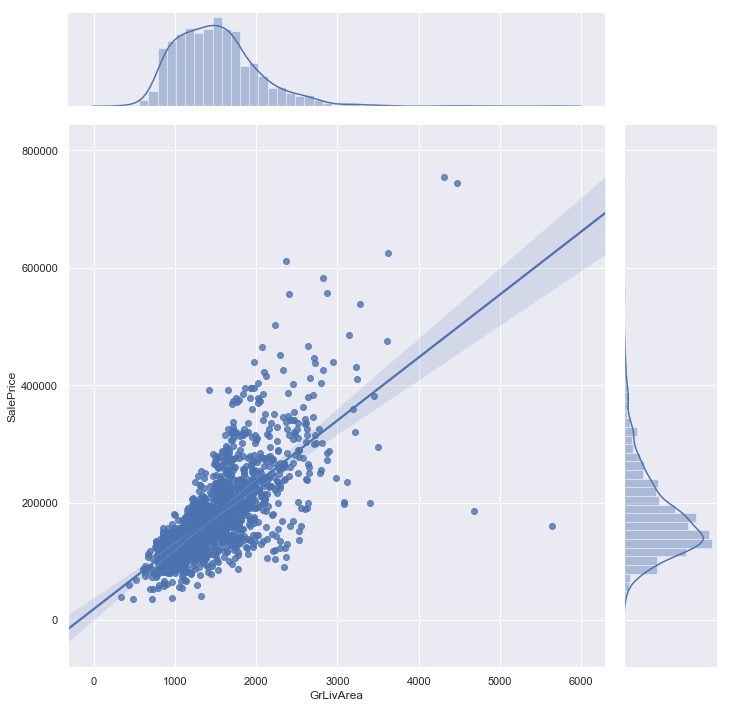

In [22]:
sns.jointplot(x="GrLivArea", y="SalePrice", kind="reg", height=10, data=train);

In [23]:
# remove outliers (huge living area for a suspiciously low price)
Ctrain = train.drop(train[(train['GrLivArea'] > 4000) & (train['SalePrice'] < 200000)].index) # Cleaned train data

In [24]:
#df = pd.concat ([train.loc[:, 'MSSubClass':'SaleCondition'], test.loc[:, 'MSSubClass':'SaleCondition']])
#df.head()